# Project 4 : Build model for marketing team of a Bank

In [1]:
# Importing the Library

from sklearn.ensemble import RandomForestClassifier # RF classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0) # random seed setting =0

In [2]:
# Importing the dataset
dataset = pd.read_csv('bank-full.csv')
print(dataset.shape)

(45211, 17)


In [3]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Check for Missing values

dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#OBSERVATION
#  --We can observe that there is no missing value in the dataset
#  --Mean Age is 40, with over 75% people under 48years of Age. While we have 95yrs as max age. 
#    This means there are some outliers. Lets see.

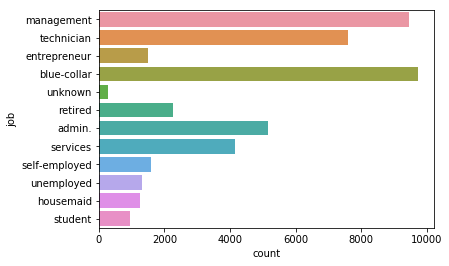

In [7]:
# Customer job distribution
sns.countplot(y="job", data=dataset)
plt.show()

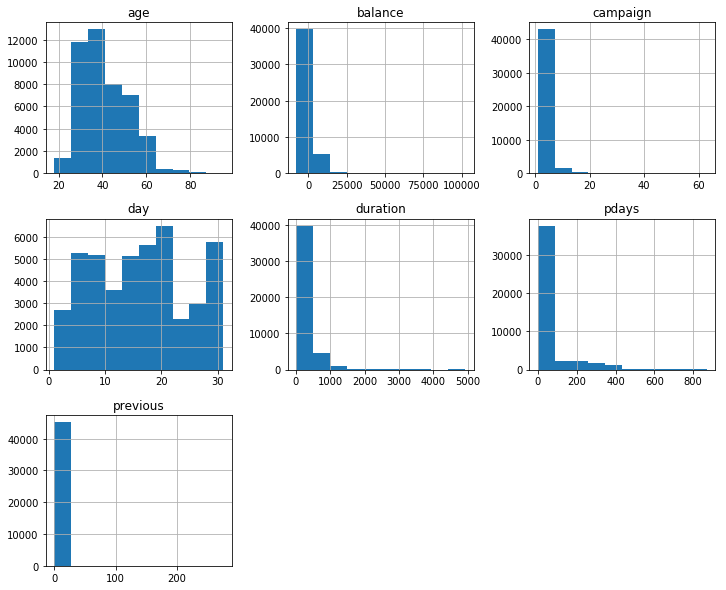

In [8]:
dataset.hist(figsize=(12, 10))
plt.show()

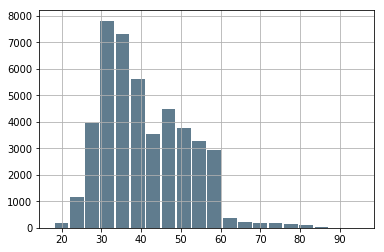

In [9]:
# AGE distribution
dataset['age'].hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.show()

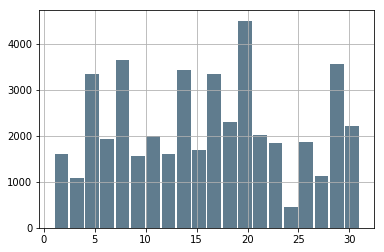

In [10]:
# DAY distribution
dataset['day'].hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.show()

In [11]:
# OBSERVATION
# Balance, Campaign, duration, pdays, previous have classification pattern
# Age & Day are distributed well.
# We would need to convert the data columns that are objects/string into numerical. Lets work on this.

In [12]:
# Convertion into numerical representation.
dataset=dataset.replace({'default': {'yes': 0}})
dataset=dataset.replace({'default': {'no': 1}})
dataset=dataset.replace({'housing': {'yes': 1}})
dataset=dataset.replace({'housing': {'no': 0}})
dataset=dataset.replace({'loan': {'yes': 1}})
dataset=dataset.replace({'loan': {'no': 0}})
dataset=dataset.replace({'poutcome': {'success': 1}})
dataset=dataset.replace({'poutcome': {'failure': 0}})

In [13]:
dataset=dataset.replace({'Target': {'yes': 1}})
dataset=dataset.replace({'Target': {'no': 0}})

In [14]:
# checking poutcome - This was the outcome of the previous marketting details
dataset['poutcome'].value_counts()

unknown    36959
0           4901
other       1840
1           1511
Name: poutcome, dtype: int64

In [15]:
# OBSERVATION
# The output of the poutcome as 'Unknown' and 'Other' is not good for our analysis. 

In [16]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,1,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,1,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,0,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,1,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,1,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


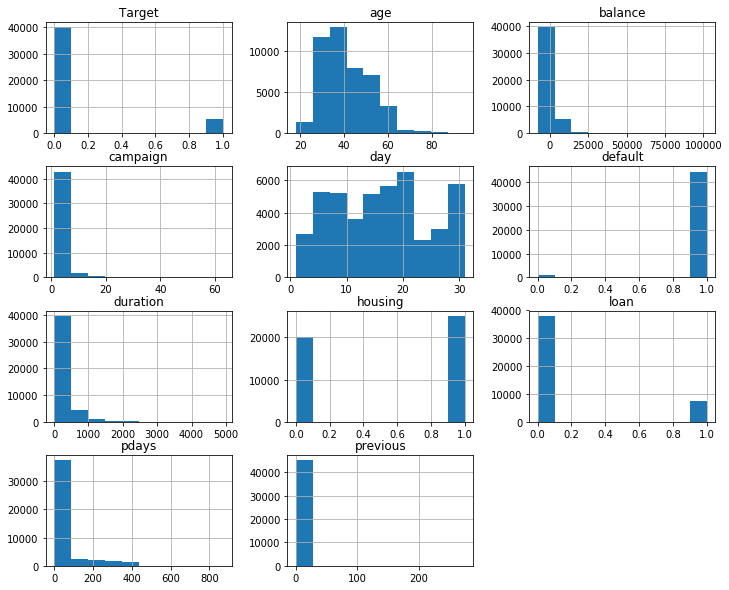

In [17]:
dataset.hist(figsize=(12, 10))
plt.show()

In [18]:
# SKEWNESS IN DATA
dataset.skew()

age          0.684818
default     -7.245375
balance      8.360308
housing     -0.224766
loan         1.852617
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
Target       2.383480
dtype: float64

In [19]:
# We see that Age, Day and almost skewed
# balance, duration, campaign, pdays, previous are Right skewed
# default and housing are LEFT skewed

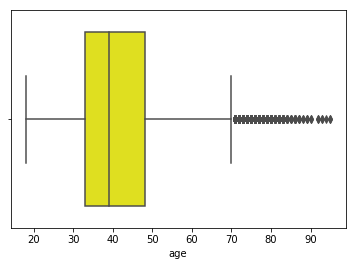

In [20]:
sns.boxplot(x="age", data=dataset, color="yellow")

In [21]:
# Age has potential outliers with certain set of people above 70 years holding the loan.

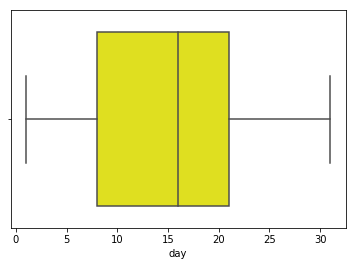

In [22]:
sns.boxplot(x="day", data=dataset, color="yellow")

In [23]:
# No outliers in day.

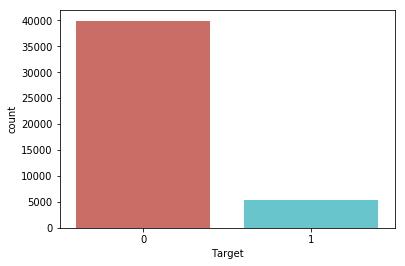

In [24]:
sns.countplot(x='Target',data=dataset, palette='hls')
plt.show()

In [25]:
# OBSERVATION: Only around 5000 people out of complete dataset took the loan

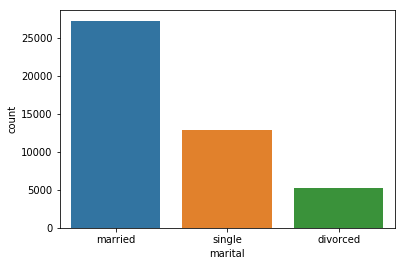

In [26]:
#  Customer marital status distribution
sns.countplot(x="marital", data=dataset)
plt.show()

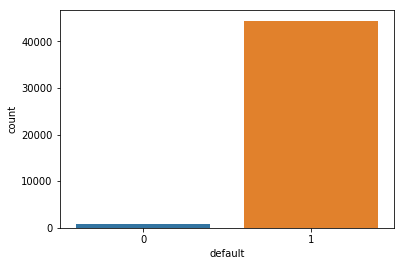

In [27]:
# Barplot for credit in default
sns.countplot(x="default", data=dataset)
plt.show()

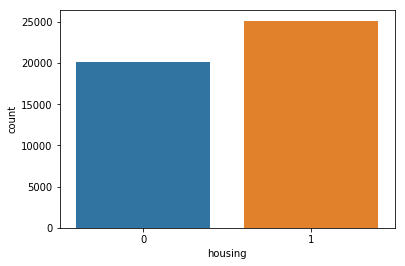

In [28]:
# Plotting Barplot for housing loan

sns.countplot(x="housing", data=dataset)
plt.show()

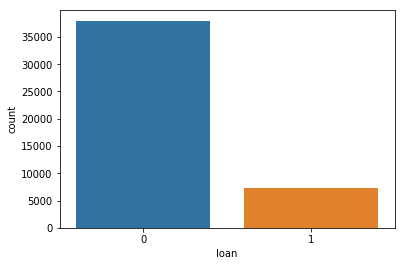

In [29]:
# Plotting Barplot for personal loan

sns.countplot(x="loan", data=dataset)
plt.show()

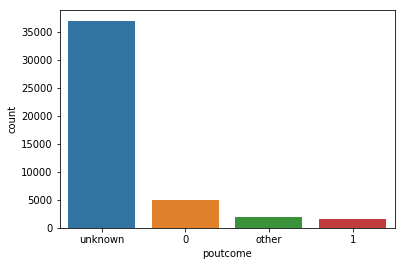

In [30]:
# Barplot for previous marketing campaign outcome

sns.countplot(x="poutcome", data=dataset)
plt.show()

# OBSERVATION 

In [31]:
# Hence our prediction will be based on the customer’s job, marital status, credit in default, housing loan,
# personal loan, and the outcome of the previous marketing campaigns.
# Hence, we are going to drop the Columns that we do not need.

In [32]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,1,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [33]:
dataset.drop(dataset.columns[[0, 3, 5, 8, 9, 10, 11, 12, 13, 14]], axis=1, inplace=True)

In [34]:
dataset.head()

,job,marital,default,housing,loan,poutcome,Target
0,management,married,1,1,0,unknown,0
1,technician,single,1,1,0,unknown,0
2,entrepreneur,married,1,1,1,unknown,0
3,blue-collar,married,1,1,0,unknown,0
4,unknown,single,1,0,0,unknown,0


# Data Preprocessing

## Trying logistic regression model

In [35]:
dataset2 = pd.get_dummies(dataset, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [36]:
dataset2.columns

Index(['Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1',
       'poutcome_0', 'poutcome_1', 'poutcome_other', 'poutcome_unknown'],
      dtype='object')

In [37]:
dataset2.drop(dataset2.columns[[12, 25]], axis=1, inplace=True)
dataset2.columns

Index(['Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_0',
       'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'poutcome_0',
       'poutcome_1', 'poutcome_other'],
      dtype='object')

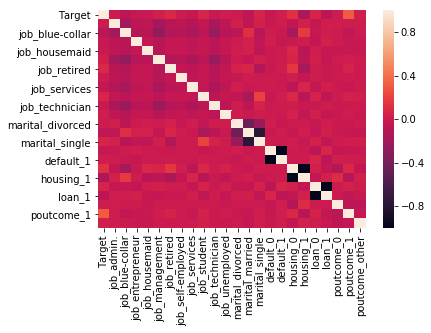

In [38]:
sns.heatmap(dataset2.corr())
plt.show()

In [39]:
# Split the data

In [40]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [41]:
X = dataset2.iloc[:,1:]
y = dataset2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
X_train.shape

(33908, 23)

In [43]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9853  125]
 [1107  218]]


In [45]:
# HENCE we have 9853 + 218 correct predictions by LogR
# AND 1107 + 125 incorrect prediction

In [46]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


## OBSERVATION: 


---- Accuracy of logistic regression classifier on test set: 0.89

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9978
           1       0.64      0.16      0.26      1325

   micro avg       0.89      0.89      0.89     11303
   macro avg       0.77      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303




## Interpretation

>Out of the entire test set, 87% of the promoted term deposit were the term deposit that the customers liked. 

>89% of the customer's preferred term deposit were promoted.


# Approach 2

In [48]:
#############
dataset3 = pd.read_csv('bank-full.csv')
print(dataset3.shape)

(45211, 17)


In [49]:
dataset3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [50]:
dataset3.shape

(45211, 17)

In [51]:
dataset3.describe

<bound method NDFrame.describe of        age            job   marital  education default  balance housing loan  \
0       58     management   married   tertiary      no     2143     yes   no   
1       44     technician    single  secondary      no       29     yes   no   
2       33   entrepreneur   married  secondary      no        2     yes  yes   
3       47    blue-collar   married    unknown      no     1506     yes   no   
4       33        unknown    single    unknown      no        1      no   no   
5       35     management   married   tertiary      no      231     yes   no   
6       28     management    single   tertiary      no      447     yes  yes   
7       42   entrepreneur  divorced   tertiary     yes        2     yes   no   
8       58        retired   married    primary      no      121     yes   no   
9       43     technician    single  secondary      no      593     yes   no   
10      41         admin.  divorced  secondary      no      270     yes   no   
11    

In [52]:
dataset3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


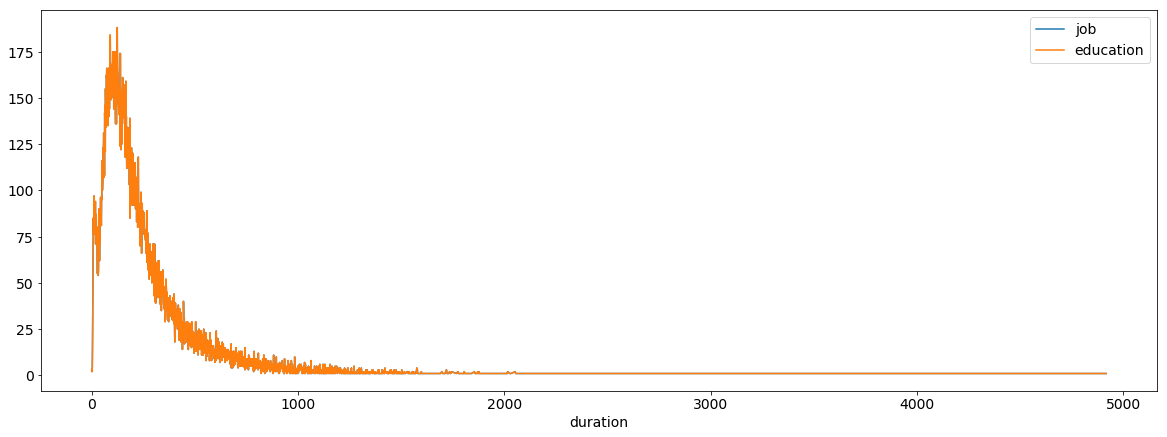

In [53]:
fig, ax = plt.subplots(figsize=(20,7))
dataset3.groupby(['duration']).count()[['job','education']].plot(ax=ax)

In [54]:
#Describing dummy keys for Target
y_n_lookup ={'yes' : 1, 'no' : 0}
dataset3['Target_dummy'] = dataset3['Target'].map(lambda x: y_n_lookup[x])
dataset3['Target_dummy'].value_counts()


0    39922
1     5289
Name: Target_dummy, dtype: int64

In [56]:
#maritial status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
dataset3['age_binned'] = pd.qcut(dataset3['age'], 4, labels = age_group_names)
gb_marital_age = dataset3['Target_dummy'].groupby([dataset3['marital'],dataset3['age_binned']] ) 
gb_marital_age.value_counts()

marital   age_binned    Target_dummy
divorced  young         0                497
                        1                 59
          lower middle  0                935
                        1                110
          middle        0               1424
                        1                159
          senior        0               1729
                        1                294
married   young         0               4578
                        1                446
          lower middle  0               5632
                        1                590
          middle        0               6902
                        1                607
          senior        0               7347
                        1               1112
single    young         0               6226
                        1               1277
          lower middle  0               2653
                        1                359
          middle        0               1373
                  

In [57]:
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.106115,0.105263,0.100442,0.145329
married,0.088774,0.094825,0.080836,0.131458
single,0.170199,0.119190,0.124920,0.113314


In [58]:
dataset3['life_stage'] = dataset3.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
dataset3['life_stage'].value_counts()

senior & married           8459
middle & married           7509
young & single             7503
lower middle & married     6222
young & married            5024
lower middle & single      3012
senior & divorced          2023
middle & divorced          1583
middle & single            1569
lower middle & divorced    1045
senior & single             706
young & divorced            556
Name: life_stage, dtype: int64

In [59]:
# OBSERVATION 

In [60]:
# This is a good stats of the people approached, 
# where Senior people who are married are most willing to take a term deposit.

/Users/e3025941/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


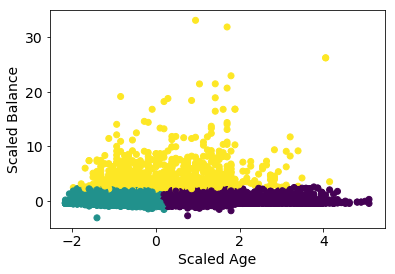

In [61]:
#Scale the data of age and balance
from sklearn import preprocessing
from sklearn import cluster
combined_data = dataset3[['age','balance']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)
#Applying KMeans clustering for prediction
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the age and balance
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Balance')
plt.show()

## Applying Ensemble

In [76]:
# Importing the libraries
from sklearn.ensemble import RandomForestClassifier # RF classifier
np.random.seed(0) # random seed setting =0
from sklearn.pipeline import make_pipeline

In [82]:
dataset2.head()

,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_0,poutcome_1,poutcome_other
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0


In [83]:
dataset2.columns

Index(['Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_0',
       'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'poutcome_0',
       'poutcome_1', 'poutcome_other'],
      dtype='object')

In [153]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

x =  dataset2.drop("Target", axis=1)
y =  dataset2['Target']

train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.35, random_state=1)

#### Quick Accuracy calculation

In [159]:
# Quick Accuracy calculation
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(test_set)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.8966759352881699


In [158]:
train_set.shape

(29387, 23)

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 1000,oob_score=True)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8946536905965622

### Overall
-Score 89% when the test_size=0.25

-Score was Slightly better when test_size=0.35

-Model Accuracy: 89.67%

-Stats of the people approached suggested that the Senior people who are married are most willing to take a term deposit.(By Approach2)

-Out of the entire test set, 87% of the promoted term deposit were the term deposit that the customers liked.(By Approach2)

-89% of the customer's preferred term deposit were promoted. (By Approach2)
